# Introduction

In [8]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, RobustScaler

In [9]:
sba = pd.read_csv('SBAnational.csv',low_memory=False)
sba.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [10]:
sba.shape

(899164, 27)

In [11]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    nan = []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        nan.append(df[i].isna().sum()/len(df)*100)

    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques, 'nan%': nan})

report(sba)

,Column,d_type,unique_sample,n_uniques,nan%
0,LoanNr_ChkDgt,int64,"[1000014003, 1000024006, 1000034009, 100004400...",899164,0.000000
1,Name,object,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",779583,0.001557
2,City,object,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",32581,0.003336
3,State,object,"[IN, OK, FL, CT, NJ]",51,0.001557
4,Zip,int64,"[47711, 46526, 47401, 74012, 32801]",33611,0.000000
5,Bank,object,"[FIFTH THIRD BANK, 1ST SOURCE BANK, GRANT COUN...",5802,0.173383
6,BankState,object,"[OH, IN, OK, FL, DE]",56,0.174162
7,NAICS,int64,"[451120, 722410, 621210, 0, 332721]",1312,0.000000
8,ApprovalDate,object,"[28-Feb-97, 2-Jun-80, 7-Feb-06, 11-Jun-80, 4-O...",9859,0.000000
9,ApprovalFY,object,"[1997, 1980, 2006, 1998, 1999]",52,0.000000


In [12]:
print(f'Object columns: {len(sba.select_dtypes(include="object").columns)}')
print(f'Numeric columns: {len(sba.select_dtypes(exclude="object").columns)}')

Object columns: 17
Numeric columns: 10


# Data Cleansing and Preprocessing


In [13]:
#ChgOffDate
# drop ChgOffDate because it has to many nan values
sba.drop('ChgOffDate', axis=1, inplace=True)

In [14]:
#State
# focus on top 5 states only (California, Texas, New York, Florida, 'Pennsylvania')
top_5_state = sba['State'].value_counts(normalize=True).sort_values(ascending=False).head().index
sba5 = sba[sba['State']=='CA']
sba5['State'].unique()

array(['CA'], dtype=object)

In [15]:
sba5 = sba5.loc[:, sba5.columns != 'State']

In [16]:
#MIS Status
sba5['MIS_Status'].isna().sum()


131

In [17]:
sba5.loc[:, 'MIS_Status'].dropna(inplace=True)
sba5['MIS_Status'].isna().sum()

131

In [18]:
# checking MIS Status values
sba5['MIS_Status'].value_counts(normalize=True)

P I F     0.814849
CHGOFF    0.185151
Name: MIS_Status, dtype: float64

In [19]:
# changing it to integer
pd.Series(np.where(sba5['MIS_Status']=='P I F', 0, 1)).value_counts(normalize=True)

0    0.814032
1    0.185968
dtype: float64

In [20]:
sba5['MIS_Status'] = np.where(sba5['MIS_Status']=='P I F', 0, 1)


In [21]:
# check duplicated rows based on all columns
sba5.duplicated().sum()

0

In [22]:
# Get month of approval date and delete ApprovalDate because it's too detail information
sba5['ApprovalMonth'] = sba5['ApprovalDate'].str.split('-').str[1]
sba5.drop('ApprovalDate', axis=1, inplace=True)

In [23]:
#NAICS
# convert NAICS code into related sector
sba5['NAICS'] = sba5['NAICS'].astype('string')

naics_to_sector = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31-33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44-45': 'Retail Trade',
    '48-49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration',
}

In [24]:
# Function to get the sector for a given NAICS code
def get_sector(naics_code):
    # Handle cases where the code has more than 2 digits (e.g., '31-33')
    first_two = naics_code[:2]
    if first_two in ['31', '44', '48']:
        if first_two == '31':
            return naics_to_sector['31-33']
        elif first_two == '44':
            return naics_to_sector['44-45']
        else:
            return naics_to_sector['48-49']
    else:
        return naics_to_sector.get(first_two, 'Unknown Sector')
    

In [25]:
sba5['Sector'] = sba5['NAICS'].apply(get_sector)
sba5.drop('NAICS', axis=1, inplace=True)

In [26]:
#Term 
# Process Term into group
(sba5['Term']/365).describe()

count    130619.000000
mean          0.388177
std           0.265486
min           0.000000
25%           0.208219
50%           0.263014
75%           0.657534
max           1.443836
Name: Term, dtype: float64

In [27]:
sba5['TermGroup'] = np.where(sba5['Term']<=90,'Below 3 months',
                            np.where((sba5['Term']>90) & (sba5['Term']<=180), '3-6 months',
                            np.where((sba5['Term']>180) & (sba5['Term']<=365), '6-12 months', 'More Than a Year')))
display(sba5[['Term', 'TermGroup']].sample(10))
sba5.drop('Term', axis=1, inplace=True)

,Term,TermGroup
211363,53,Below 3 months
706109,84,Below 3 months
200518,70,Below 3 months
369553,90,Below 3 months
872008,120,3-6 months
101304,11,Below 3 months
164148,53,Below 3 months
832522,240,6-12 months
450285,120,3-6 months
233531,34,Below 3 months


In [28]:
# drop NewExist when 0 and NaN
display(sba5['NewExist'].value_counts(dropna=False))
sba5 = sba5[sba5['NewExist']!=0]
sba5.dropna(subset='NewExist')['NewExist'].value_counts(dropna=False)

1.0    108947
2.0     21549
0.0       112
NaN        11
Name: NewExist, dtype: int64

1.0    108947
2.0     21549
Name: NewExist, dtype: int64

In [29]:
# drop NaN from NewExist. Will not effect that much to the model.
sba5 = sba5.dropna(subset='NewExist')

In [30]:
sba5['NewExist'] = np.where(sba5['NewExist']==1, 'Exist Business', 'New Business')

In [31]:
# drop BalanceGross it has only one value
sba5.drop('BalanceGross', axis=1, inplace=True)

In [32]:
# drop ChgOffPrinGr it will leaks information to the model.
# Everytime it has a value, the status always CHGOFF
sba5.drop('ChgOffPrinGr', axis=1, inplace=True)

In [33]:
# drop SBA_Appv, in the future will would not know how much the amount will be approved
sba5.drop('SBA_Appv', axis=1, inplace=True)

In [34]:
# drop DisbursementGross, we don't need it
sba5.drop('DisbursementGross', axis=1, inplace=True)

In [35]:
# drop DisbursementDate, we don't need it
sba5.drop('DisbursementDate', axis=1, inplace=True)

In [36]:
# We drop approvalFY besauce we want to predict future loan proposal.
# So, if we want to predict proposal from FY 2023, the model will not know the data yet.
sba5.drop('ApprovalFY', axis=1, inplace=True)

In [37]:
# process GrAppv, replace $ and , with empty string
sba5['GrAppv'] = sba5['GrAppv'].astype(str).str.replace('$', '', regex=False)
sba5['GrAppv'] = sba5['GrAppv'].str.replace('$', '',regex=False)
sba5['GrAppv'] = sba5['GrAppv'].str.replace(',', '',regex=False)
sba5['GrAppv'] = sba5['GrAppv'].astype('float')

In [38]:
checking_name = sba5.groupby(['Name', 'NewExist']).agg({"Name":"count", "MIS_Status":"mean"}).rename(columns={'Name':'Count', 'NewExist': 'NewExist_Ratio', 'MIS_Status':'CHGOff_Ratio'})
checking_name.sort_values('Count', ascending=False)

,,Count,CHGOff_Ratio
Name,NewExist,,
"Meathead Movers, Inc.",Exist Business,74,0.581081
SUBWAY,Exist Business,38,0.026316
QUIZNO'S SUBS,New Business,37,0.135135
COLD STONE CREAMERY,New Business,34,0.176471
QUIZNO'S CLASSIC SUBS,New Business,30,0.033333
...,...,...,...
Floors To Go,Exist Business,1,1.000000
Floornomad Inc.,New Business,1,1.000000
Floormaster,Exist Business,1,0.000000


In [39]:
sba5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130496 entries, 28 to 899161
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanNr_ChkDgt  130496 non-null  int64  
 1   Name           130496 non-null  object 
 2   City           130490 non-null  object 
 3   Zip            130496 non-null  int64  
 4   Bank           130358 non-null  object 
 5   BankState      130357 non-null  object 
 6   NoEmp          130496 non-null  int64  
 7   NewExist       130496 non-null  object 
 8   CreateJob      130496 non-null  int64  
 9   RetainedJob    130496 non-null  int64  
 10  FranchiseCode  130496 non-null  int64  
 11  UrbanRural     130496 non-null  int64  
 12  RevLineCr      129992 non-null  object 
 13  LowDoc         130325 non-null  object 
 14  MIS_Status     130496 non-null  int32  
 15  GrAppv         130496 non-null  float64
 16  ApprovalMonth  130496 non-null  object 
 17  Sector         130496 non-nu

In [40]:
# checking RevLineCr
sba5['RevLineCr'].value_counts()

N    52160
0    45675
Y    29782
T     2363
1        7
`        4
4        1
Name: RevLineCr, dtype: int64

In [41]:
# We will filter only N and Y since those are only explainable value
sba5 = sba5[sba5['RevLineCr'].isin(['N','Y'])]

In [42]:
# checking LowDoc
sba5['LowDoc'].value_counts()

N    78137
Y     3180
0      376
S       45
C       27
A        5
R        2
Name: LowDoc, dtype: int64

In [43]:
# We will filter only N and Y since those are only explainable value
sba5 = sba5[sba5['LowDoc'].isin(['N','Y'])]

In [44]:
# We drop rows that the Bank, BankState, City and LowDoc that have Null value
sba5.dropna(subset=['Bank', 'BankState', 'City', 'LowDoc'], inplace=True)

In [45]:
sba5['BankState'].value_counts().describe()


count       49.000000
mean      1656.591837
std       6589.987541
min          1.000000
25%          4.000000
50%         16.000000
75%        324.000000
max      44111.000000
Name: BankState, dtype: float64

In [46]:
print(sba5['BankState'].unique())


['SD' 'CA' 'IL' 'OR' 'NY' 'TX' 'NV' 'MO' 'CO' 'NC' 'VA' 'DC' 'MA' 'OH'
 'WA' 'RI' 'FL' 'AK' 'UT' 'MD' 'ID' 'SC' 'AL' 'DE' 'AZ' 'HI' 'TN' 'CT'
 'MN' 'OK' 'NH' 'PR' 'AR' 'ND' 'NJ' 'KS' 'MS' 'MT' 'GA' 'WI' 'IA' 'NM'
 'IN' 'LA' 'ME' 'NE' 'KY' 'WY' 'PA']


In [47]:
# We convert BankState that appeared under 15 times into 'OTHER'
count_bankst = sba5['BankState'].value_counts().to_frame().reset_index().rename(columns={'BankState': 'BankStateCount'})

# Make sure 'BankState' in count_bankst is of the same type as 'BankState' in sba5
count_bankst['BankState'] = count_bankst['index']

# Merge on 'BankState'
sba5 = sba5.merge(count_bankst[['BankState', 'BankStateCount']], on='BankState', how='left')

# Create a new column based on the condition
sba5['NewBankState'] = np.where(sba5['BankStateCount'] > 15, sba5['BankState'], 'OTHER')

# Drop unnecessary columns
sba5.drop(['BankState', 'BankStateCount'], axis=1, inplace=True)


In [48]:
sba5.drop(['Name', 'LoanNr_ChkDgt', 'Zip'], axis=1, inplace=True)

In [49]:
sba5['IsFranchise'] = np.where(((sba5['FranchiseCode']==1) | (sba5['FranchiseCode']==0)), 'Y', 'N')
sba5.drop('FranchiseCode', axis=1, inplace=True)

In [50]:
sba5['IsFranchise'].value_counts()


Y    79024
N     2149
Name: IsFranchise, dtype: int64

In [51]:
sba5.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 0 to 81172
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           81173 non-null  object 
 1   Bank           81173 non-null  object 
 2   NoEmp          81173 non-null  int64  
 3   NewExist       81173 non-null  object 
 4   CreateJob      81173 non-null  int64  
 5   RetainedJob    81173 non-null  int64  
 6   UrbanRural     81173 non-null  int64  
 7   RevLineCr      81173 non-null  object 
 8   LowDoc         81173 non-null  object 
 9   MIS_Status     81173 non-null  int32  
 10  GrAppv         81173 non-null  float64
 11  ApprovalMonth  81173 non-null  object 
 12  Sector         81173 non-null  object 
 13  TermGroup      81173 non-null  object 
 14  NewBankState   81173 non-null  object 
 15  IsFranchise    81173 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(10)
memory usage: 10.2+ MB


In [52]:
# City has too many unique value.
# Also, most of them (75%) are only appear once or 12 times only.
# We need to process it so it would not make the model too complex.
sba5['City'] = sba5['City'].str.upper()
sba5['City'].nunique()

1930

In [53]:
sba5['City'].value_counts().to_frame().describe()


,City
count,1930.000000
mean,42.058549
std,222.620321
min,1.000000
25%,1.000000
50%,2.000000
75%,17.000000
max,7526.000000


In [54]:
count_city = sba5['City'].value_counts().reset_index().rename(columns={'City': 'City_Count', 'index': 'City'})


In [55]:
count_city[(count_city['City_Count']>25)&(count_city['City_Count']<=50)]


,City,City_Count
308,SAUSALITO,50
309,NORTH HIGHLANDS,50
310,ORANGEVALE,50
311,LOMITA,49
312,SAN ANSELMO,49
...,...,...
418,TEMPLE CITY,27
419,NORTHRIDGE (NORTH LOS ANGELES),26
420,DESERT HOT SPRINGS,26
421,MONTROSE,26


In [56]:
sba5 = sba5.merge(count_city, on='City')


In [57]:
sba5['NewCity'] = np.where(sba5['City_Count']>100, sba5['City'], 'OTHER')


In [58]:
checking_city = sba5.groupby('NewCity').agg({'MIS_Status':'mean'}).sort_values('MIS_Status', ascending=False).reset_index()
checking_city[checking_city['NewCity']=='OTHER']

,NewCity,MIS_Status
90,OTHER,0.206937


In [59]:
sba5.drop(['City', 'City_Count'],axis=1,inplace=True)


In [60]:
# Bank has too many unique value.
# Also, most of them (75%) are only appear once or 29 times only.
# We need to process it so it would not make the model too complex.
sba5['Bank'] = sba5['Bank'].str.upper()
sba5['Bank'].nunique()

469

In [61]:
sba5['Bank'].value_counts().to_frame().describe()

,Bank
count,469.000000
mean,173.076759
std,850.286756
min,1.000000
25%,2.000000
50%,7.000000
75%,46.000000
max,12200.000000


In [62]:
count_bank = sba5['Bank'].value_counts().to_frame().reset_index().rename(columns={'Bank': 'Bank_Count','index' :'Bank'})

In [63]:
count_bank[(count_bank['Bank_Count']>1)&(count_bank['Bank_Count']<=29)]


,Bank,Bank_Count
141,EXCHANGE BANK,29
142,PREMIER VALLEY BANK,29
143,FIRST REPUBLIC BANK,29
144,FDIC/MECHANICS BANK,28
145,GROW AMERICA FUND INC,28
...,...,...
352,CHETCO FCU,2
353,NEW VENTURES CAP. DEVEL CO,2
354,FIRST FINANCIAL BANK,2
355,"BANK OF NEVADA, A DIVISION OF",2


In [64]:
sba5 = sba5.merge(count_bank, on='Bank')
sba5['NewBank'] = np.where(sba5['Bank_Count']>100, sba5['Bank'], 'OTHER')
checking_bank = sba5.groupby('NewBank').agg({'MIS_Status':'mean'}).sort_values('MIS_Status', ascending=False).reset_index()
checking_bank[checking_bank['NewBank']=='OTHER']

,NewBank,MIS_Status
24,OTHER,0.152458


In [65]:
sba5.drop(['Bank', 'Bank_Count'], axis=1, inplace=True)


In [66]:
sba5['MIS_Status'].value_counts()


0    63604
1    17569
Name: MIS_Status, dtype: int64

In [67]:
sba5['UrbanRural'] = np.where(sba5['UrbanRural']==1, 'Urban',
                             np.where(sba5['UrbanRural']==2, 'Rural', 'Undefined'))

In [68]:
# we don't need to use this feature since we are needed to help banks to determine
# the company's status (CHGOFF or PIF) even before the bank approves their proposal
sba5.drop('GrAppv', axis=1, inplace=True)

# Exploratory Data Analysis and Visualization


In [69]:
sba5.rename(columns={'MIS_Status':'ChargeOff'}, inplace=True)
sba5['ChargeOff'] = sba5['ChargeOff'].astype('category')

In [70]:
sba_cat = sba5.select_dtypes(include='object')
sba_num = sba5.select_dtypes(exclude='object')

In [71]:
for col in sba_cat.columns:
    sba_cat[col] = sba_cat[col].astype('category')

In [72]:
sba_cat.columns

Index(['NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ApprovalMonth',
       'Sector', 'TermGroup', 'NewBankState', 'IsFranchise', 'NewCity',
       'NewBank'],
      dtype='object')

In [73]:
sba_cat.head()


,NewExist,UrbanRural,RevLineCr,LowDoc,ApprovalMonth,Sector,TermGroup,NewBankState,IsFranchise,NewCity,NewBank
0,New Business,Urban,Y,N,Feb,Educational Services,Below 3 months,SD,Y,CAMARILLO,WELLS FARGO BANK NATL ASSOC
1,Exist Business,Urban,Y,N,Aug,Retail Trade,Below 3 months,CA,Y,CAMARILLO,WELLS FARGO BANK NATL ASSOC
2,Exist Business,Undefined,N,N,Nov,Unknown Sector,6-12 months,SD,Y,CAMARILLO,WELLS FARGO BANK NATL ASSOC
3,Exist Business,Undefined,N,N,Nov,Unknown Sector,3-6 months,CA,Y,CAMARILLO,WELLS FARGO BANK NATL ASSOC
4,Exist Business,Urban,Y,N,Jun,Health Care and Social Assistance,Below 3 months,SD,Y,CAMARILLO,WELLS FARGO BANK NATL ASSOC


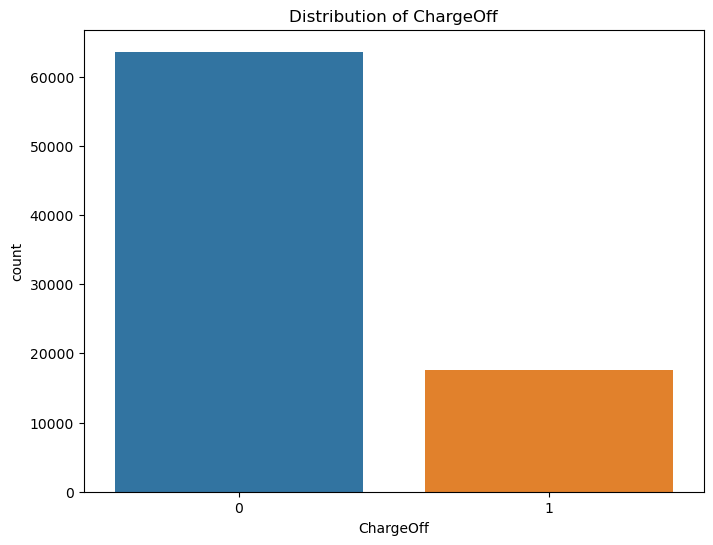

In [74]:
# Convert categorical columns to category data type
for col in sba_cat.columns:
    sba_cat[col] = sba_cat[col].astype('category')

# Plot distribution of target variable (ChargeOff)
plt.figure(figsize=(8, 6))
sns.countplot(x='ChargeOff', data=sba5)
plt.title('Distribution of ChargeOff')
plt.show()


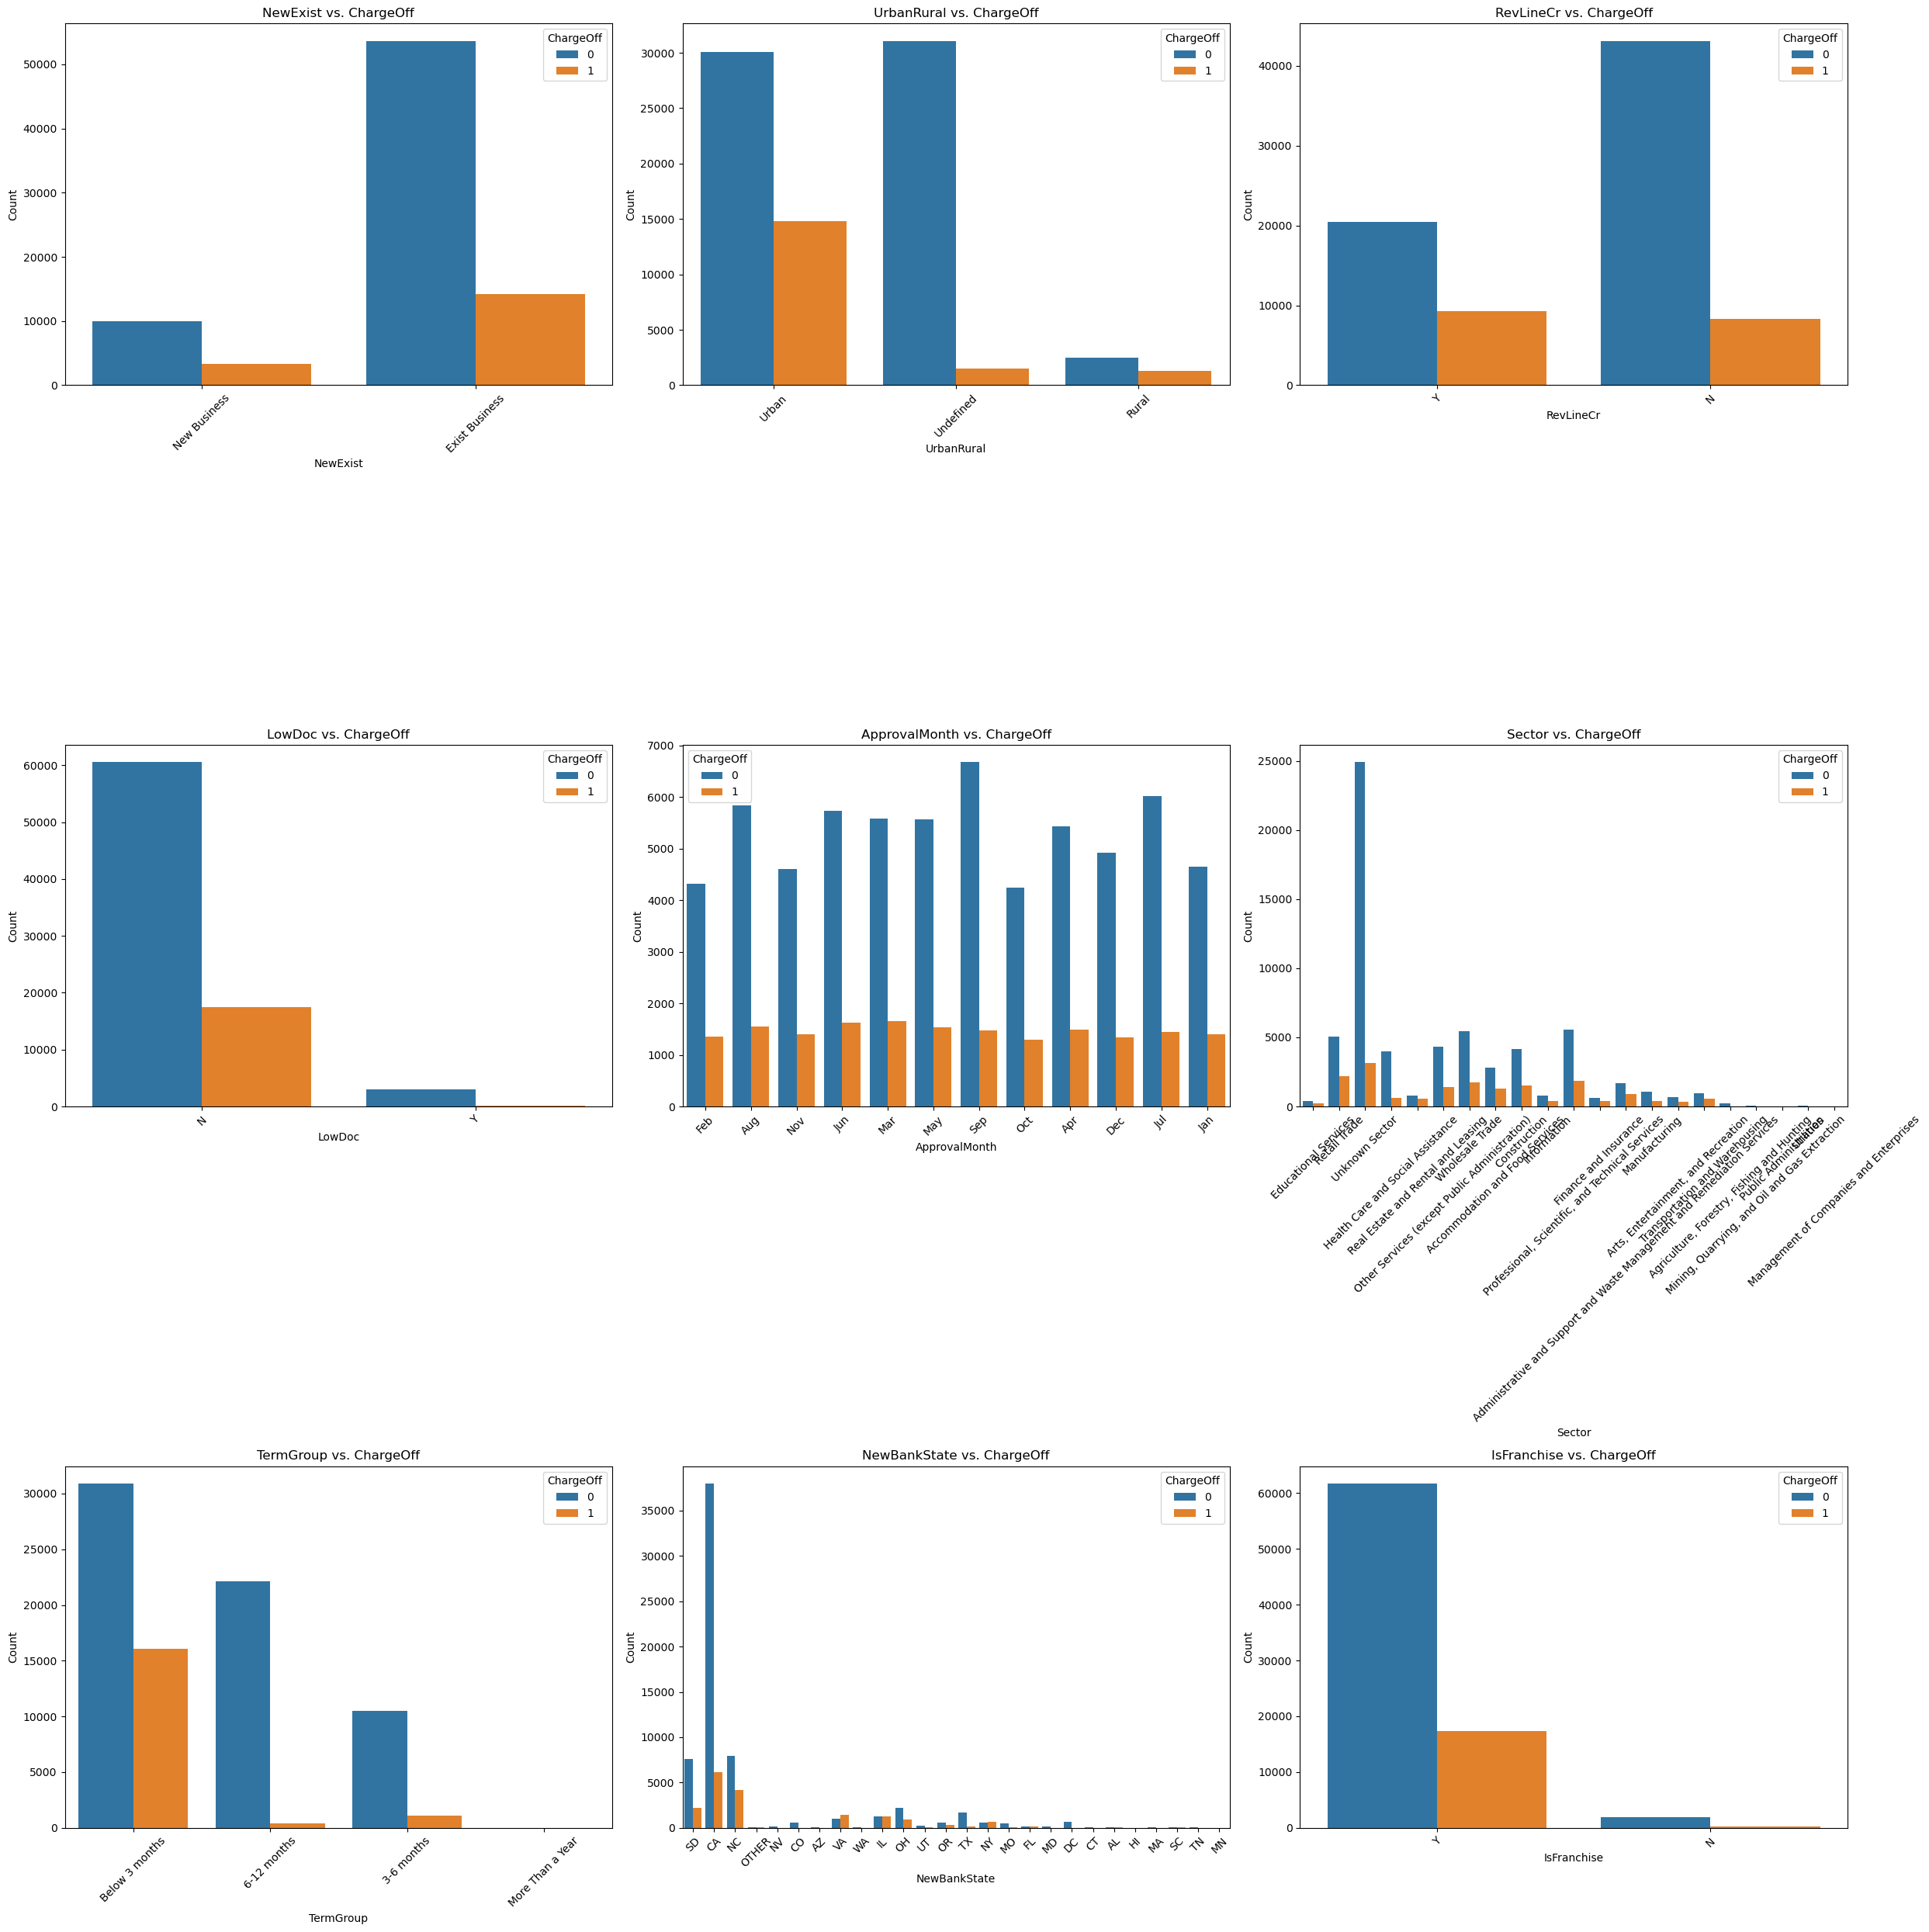

In [75]:
plt.figure(figsize=(25,25))

# Assuming you have 9 columns in sba_cat
num_cols = min(len(sba_cat.columns), 9)

for i, col in enumerate(sba_cat.columns[:num_cols], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='ChargeOff', data=sba5)
    plt.title(f'{col} vs. ChargeOff')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\dipas\AppData\Local\Temp\ipykernel_13460\3391214381.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sba_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')


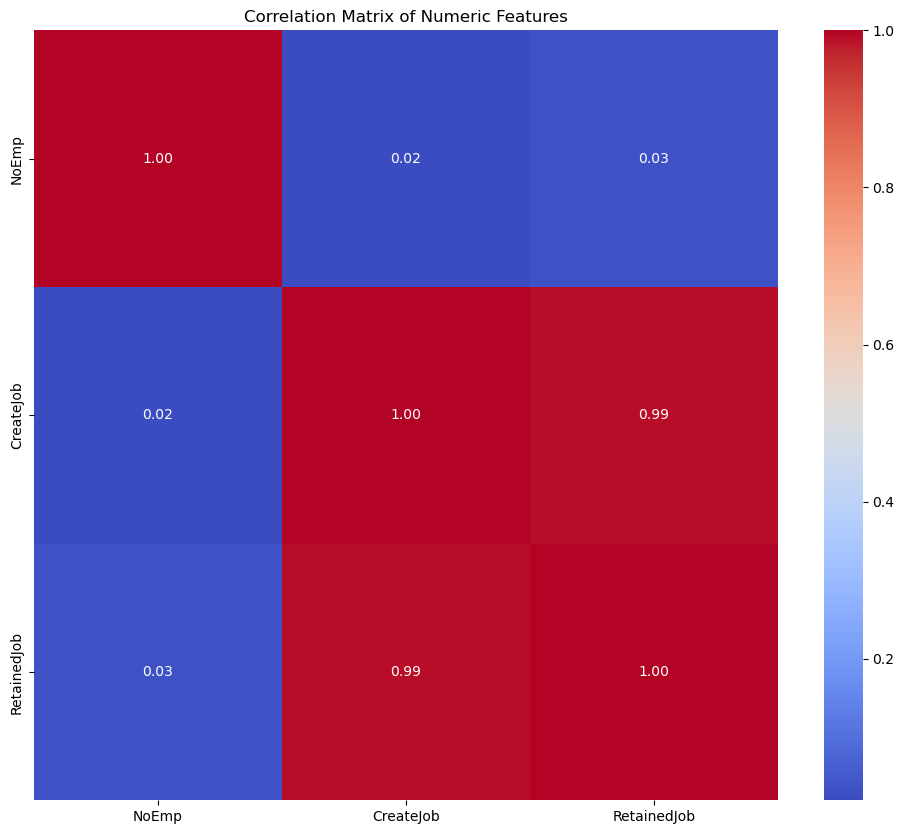

In [76]:
# Visualize the correlation matrix for numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(sba_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [77]:
from sklearn.model_selection import train_test_split

# We also delete ApprovalMonth column, because this column value appear AFTER the lender approve their Credit Proposal.
# One of our objectives is to predict whether the company is PIF or CHGOFF, BEFORE the lender approve it.
X = sba5.drop(columns=['ChargeOff', 'ApprovalMonth'])
y = sba5['ChargeOff']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, stratify=y, random_state=2023)
X_train_val.shape, X_test.shape

((60879, 13), (20294, 13))

In [78]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train_val, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

X_train_encoded.shape, X_test_encoded.shape


((60879, 333), (20294, 333))

In [79]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60879 entries, 29861 to 48215
Columns: 333 entries, NoEmp to NewBank_ZIONS FIRST NATIONAL BANK
dtypes: int64(3), uint8(330)
memory usage: 21.0 MB


# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression(max_iter = 500)

logreg.fit(X_train_encoded, y_train_val)

print(logreg.coef_)
print(logreg.intercept_)

## (b) Accuracy
print("Test Accuracy is:", logreg.score(X_test_encoded, y_test))

[[-4.11963326e-03  2.91744509e-03 -2.64554100e-03 -3.77580560e-02
  -1.55885423e+00 -3.15686025e-01 -6.28147819e-01 -1.21298205e+00
   9.73387810e-02 -3.56724791e-01  1.30411017e-01  4.07401000e-02
  -1.32798698e-01  2.65902130e-01 -6.75320742e-01 -8.20582397e-02
   2.27855220e-03 -1.81387254e-01 -2.11018801e-02 -6.27239580e-02
  -3.09177885e-01 -1.50530464e-02  5.00647224e-01  2.11336201e-02
   1.40184971e-01 -8.46764011e-02 -3.76126631e-02 -1.32239025e-01
  -1.47866336e+00  1.18367457e+00  2.11964919e-02 -1.27287310e-02
  -8.51397633e-01 -1.99273064e-01  6.18196176e-03 -3.55248002e-01
   7.19678401e-02 -3.10687930e-03  4.38057030e-01 -1.30010337e-01
  -7.94387622e-02  2.83445692e-03 -1.85685369e-01 -4.04667713e-01
  -6.01111422e-01  1.84343435e-01 -1.49364269e-01  1.81046585e-01
   1.17476129e-01  6.33085484e-02  9.80869559e-01 -3.89332824e-02
  -1.61940058e-01 -1.27371383e-01  5.26071044e-01 -6.34547204e-02
   5.21149954e-02 -1.22041218e-01 -5.36256962e-02  1.75261944e-01
  -3.70253

C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score

y_test_pred = logreg.predict(X_test_encoded)
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred) )
print('F1 score:', f1_score(y_test, y_test_pred) )

Precision score: 0.6686046511627907
Recall score: 0.340391621129326
Accuracy score: 0.8207351926677836
F1 score: 0.4511164755582378


In [82]:
print(confusion_matrix(y_test, y_test_pred ))
print(classification_report(y_test, y_test_pred))

[[15161   741]
 [ 2897  1495]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     15902
           1       0.67      0.34      0.45      4392

    accuracy                           0.82     20294
   macro avg       0.75      0.65      0.67     20294
weighted avg       0.80      0.82      0.80     20294



Text(0, 0.5, 'TPR')

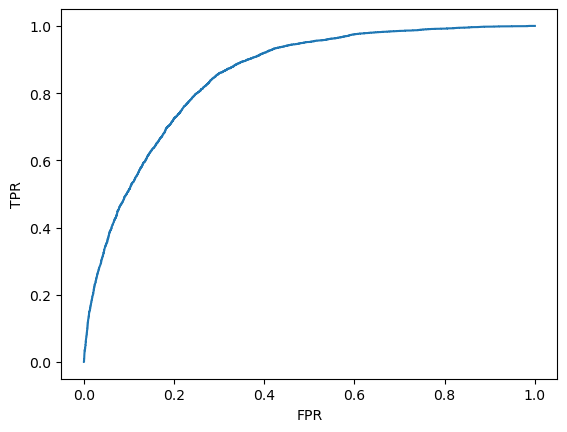

In [84]:
from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
pred_prob = logreg.predict_proba(X_test_encoded)[:,1]
# Get Measures
fpr,tpr,threshold = roc_curve(y_test,pred_prob)

# Generate Figure
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

# Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_samples = 100, random_state = 42) # features as default
# estimator dropped, estimator will be tree
rf.fit(X_train_encoded, y_train_val)
rf.score(X_test_encoded, y_test), rf.feature_importances_

(0.7940277914654578,
 array([8.28334975e-02, 3.98898736e-02, 8.27712596e-02, 1.77964197e-02,
        2.66349088e-02, 2.64054288e-02, 2.86315758e-02, 2.50380034e-03,
        1.00888761e-02, 1.97669271e-04, 3.40796291e-03, 1.37843306e-02,
        2.29900904e-03, 5.31634272e-03, 8.04763934e-03, 5.22604532e-03,
        1.18939932e-04, 4.05024684e-03, 2.64557400e-05, 1.25320683e-02,
        1.40612336e-02, 0.00000000e+00, 7.15479160e-03, 1.40032957e-02,
        6.58655816e-03, 1.96574753e-02, 3.23677666e-05, 1.42256017e-02,
        2.12640606e-02, 3.39552436e-02, 0.00000000e+00, 0.00000000e+00,
        2.38857796e-02, 1.99431532e-04, 1.03199174e-05, 3.21314878e-04,
        1.61900622e-03, 0.00000000e+00, 1.09219004e-02, 2.28431426e-04,
        1.69082126e-04, 0.00000000e+00, 1.01115673e-03, 1.49278601e-02,
        2.86345934e-04, 6.02860642e-03, 8.37042311e-03, 3.10360056e-03,
        4.29262952e-04, 3.97127866e-04, 1.08804062e-02, 1.11000111e-05,
        1.76359886e-03, 8.28188962e-04, 1.2

In [87]:
# Necessary imports
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
param_grid = {
    'max_depth': [80, 90, 100],
    'n_estimators': [100, 200, 300]
}
 
# Instantiating logistic regression classifier
rf = RandomForestClassifier(max_samples = 100, random_state = 42)
 
# Instantiating the GridSearchCV object
rf_cv = GridSearchCV(rf, param_grid, cv = 3)
 
rf_cv.fit(X_train_encoded, y_train_val)
 
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_)) 
print("Best score is {}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': 80, 'n_estimators': 100}
Best score is 0.799011153271243


In [88]:
# Create a prediction for our testing data and print out our confusion matrix and classification report 
prediction = rf_cv.predict(X_test_encoded)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[15761   141]
 [ 4044   348]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     15902
           1       0.71      0.08      0.14      4392

    accuracy                           0.79     20294
   macro avg       0.75      0.54      0.51     20294
weighted avg       0.78      0.79      0.72     20294



# Support Vector Machine SVM

In [92]:
# Linear SVC 
from sklearn.svm import LinearSVC
lr_svc = LinearSVC(random_state = 0) # C = 1 as default
lr_svc.fit(X_train_encoded, y_train_val)
# Make predictions on the test set
y_pred = lr_svc.predict(X_test_encoded)
 
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8166453138858776


C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [93]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14781  1121]
 [ 2600  1792]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     15902
           1       0.62      0.41      0.49      4392

    accuracy                           0.82     20294
   macro avg       0.73      0.67      0.69     20294
weighted avg       0.80      0.82      0.80     20294



In [102]:
# Linear SVC with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define Function
linear_svc = LinearSVC(random_state = 0) # must specify random state here

# Define a list of hyperparameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100]   }

# a large c approximates hard margin SVM scenario
grid_sv = GridSearchCV(linear_svc,params_svc,n_jobs = 2)

grid_sv.fit(X_train_encoded, y_train_val)


C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [103]:
grid_sv.best_params_

{'C': 0.1}

In [104]:
y_pred = grid_sv.predict(X_test_encoded)
 
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8192076475805656


# DECISION TREE

In [97]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
 
# Train the classifier on the training set
clf.fit(X_train_encoded, y_train_val)
 
# Make predictions on the test set
y_pred = clf.predict(X_test_encoded)
 
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7903813935153248


In [98]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13910  1992]
 [ 2262  2130]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     15902
           1       0.52      0.48      0.50      4392

    accuracy                           0.79     20294
   macro avg       0.69      0.68      0.68     20294
weighted avg       0.79      0.79      0.79     20294



C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


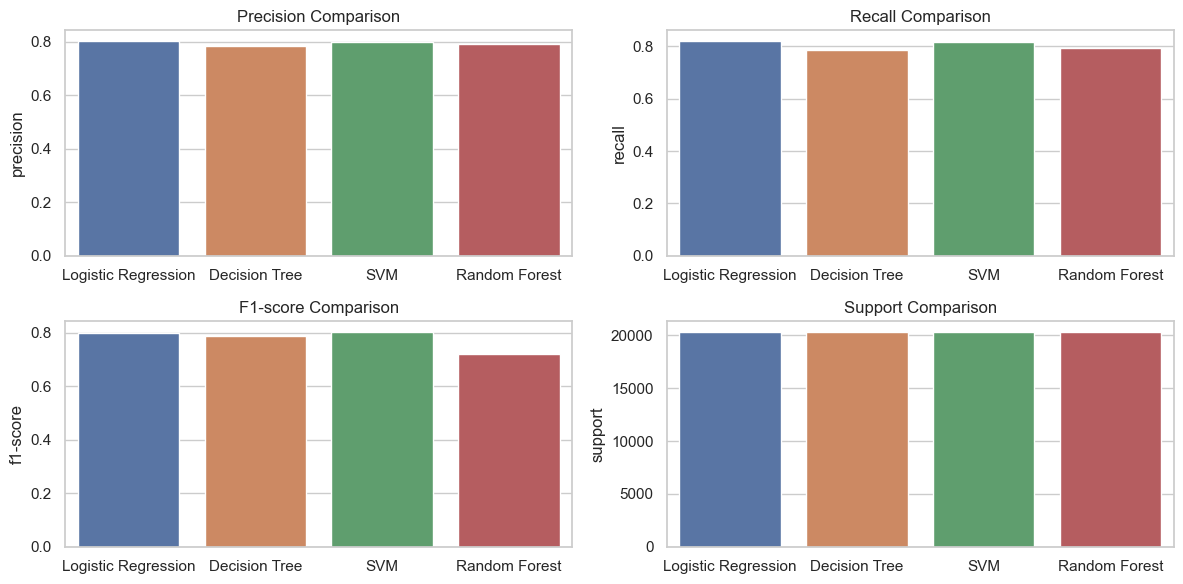

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Create and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter = 500),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": LinearSVC(random_state = 0),
    "Random Forest": RandomForestClassifier(n_estimators = 200, max_samples = 100, random_state = 42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_encoded, y_train_val)
    y_pred = model.predict(X_test_encoded)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report["weighted avg"]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame(results).T

# Plot the metrics
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

metrics = ["precision", "recall", "f1-score", "support"]

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=df.index, y=df[metric])
    plt.title(f"{metric.capitalize()} Comparison")

plt.tight_layout()
plt.show()


C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\dipas\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


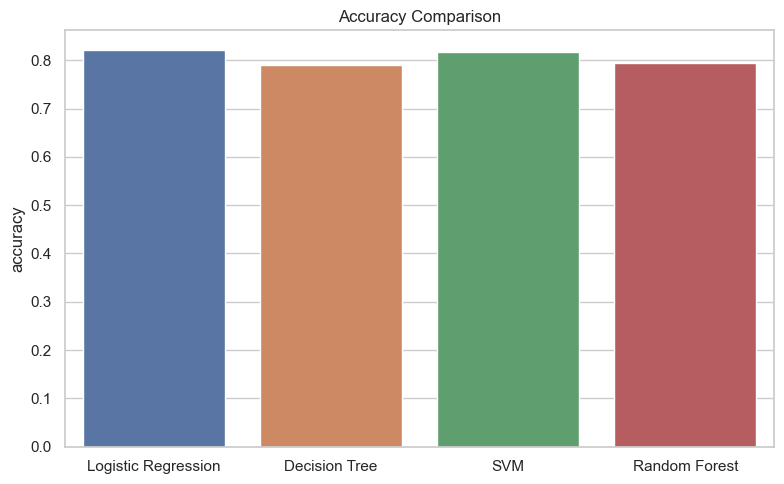

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    model.fit(X_train_encoded, y_train_val)
    y_pred = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": accuracy}

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame(results).T

# Plot accuracy
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(x=df.index, y=df["accuracy"])
plt.title("Accuracy Comparison")

plt.tight_layout()
plt.show()
